In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tickers = ["^VIX","^GSPC"]
interval = "1d"
start = "2005-10-01"

data = yf.download(tickers, start = start, interval = interval,auto_adjust=True)["Close"]

data = data.rename(columns={"^VIX":"VIX","^GSPC":"SP500" })

# manual resample beacuse yf use different weekly date for these two assets
data = data.resample('W-FRI').last()

[*********************100%***********************]  2 of 2 completed


In [ ]:
data.head()

Ticker,SP500,VIX
Date,,
2005-10-07,1195.900024,14.590000
2005-10-14,1186.569946,14.870000
2005-10-21,1179.589966,16.129999
2005-10-28,1198.410034,14.250000
2005-11-04,1220.140015,13.170000


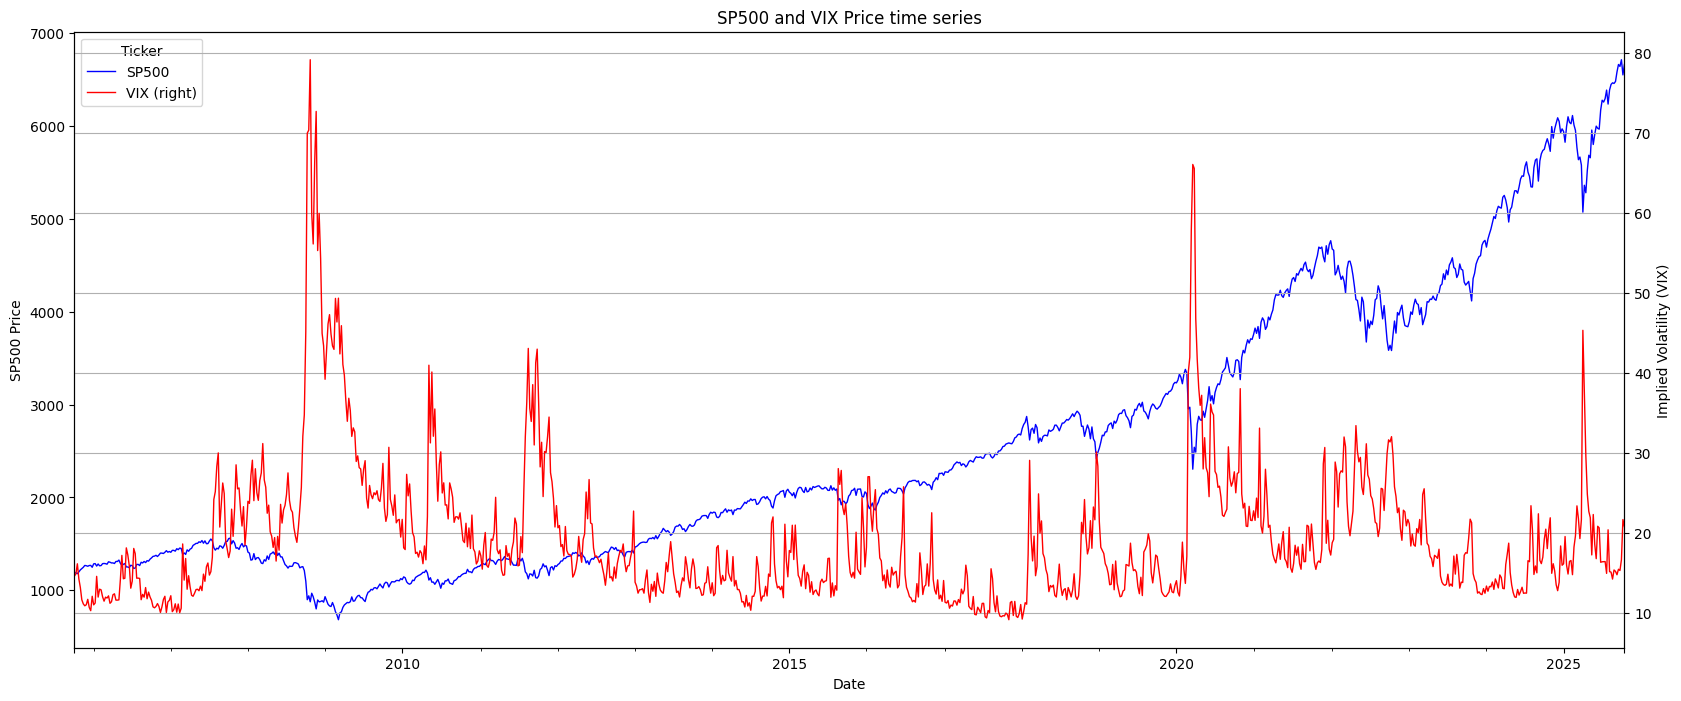

In [ ]:
ax = data[["SP500","VIX"]].plot(
    secondary_y="VIX",
    figsize=(20,8),
    color={"SP500":"blue", "VIX":"red"},
    linewidth=1)

ax.set_ylabel("SP500 Price")
ax.right_ax.set_ylabel("Implied Volatility (VIX)")

plt.grid()
plt.title("SP500 and VIX Price time series")

plt.show()

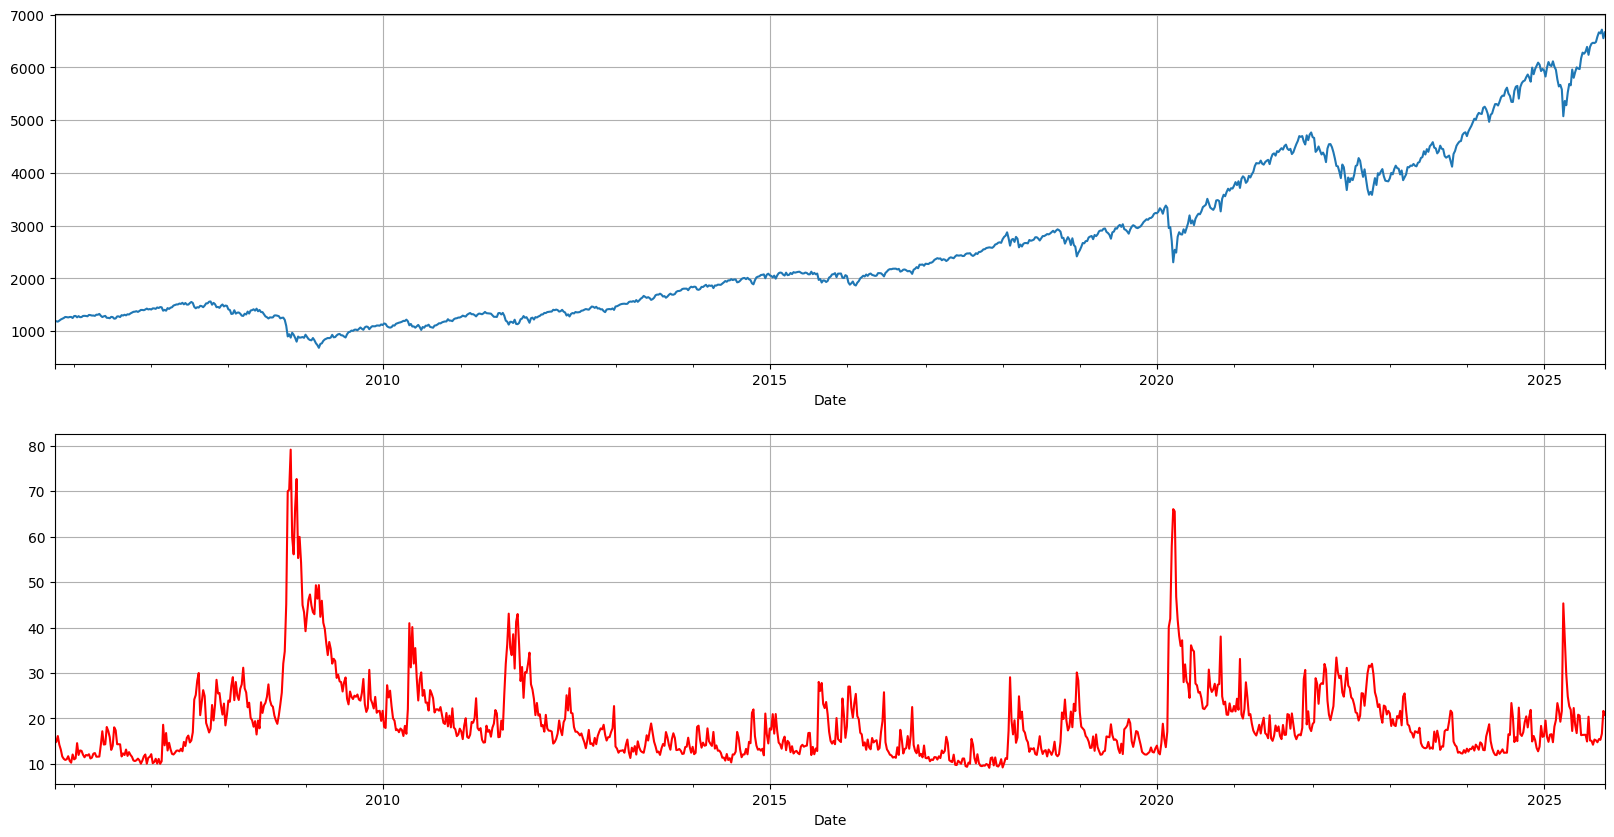

In [ ]:
plt.subplot(2,1,1)
data["SP500"].plot(figsize =(20,12),label="VIX")
#plt.yscale('log')
#plt.ylabel("Log scale")
plt.grid()

plt.subplot(2,1,2)
data["VIX"].plot(figsize =(20,10),color="red",label="SP500")
plt.grid()

plt.show()

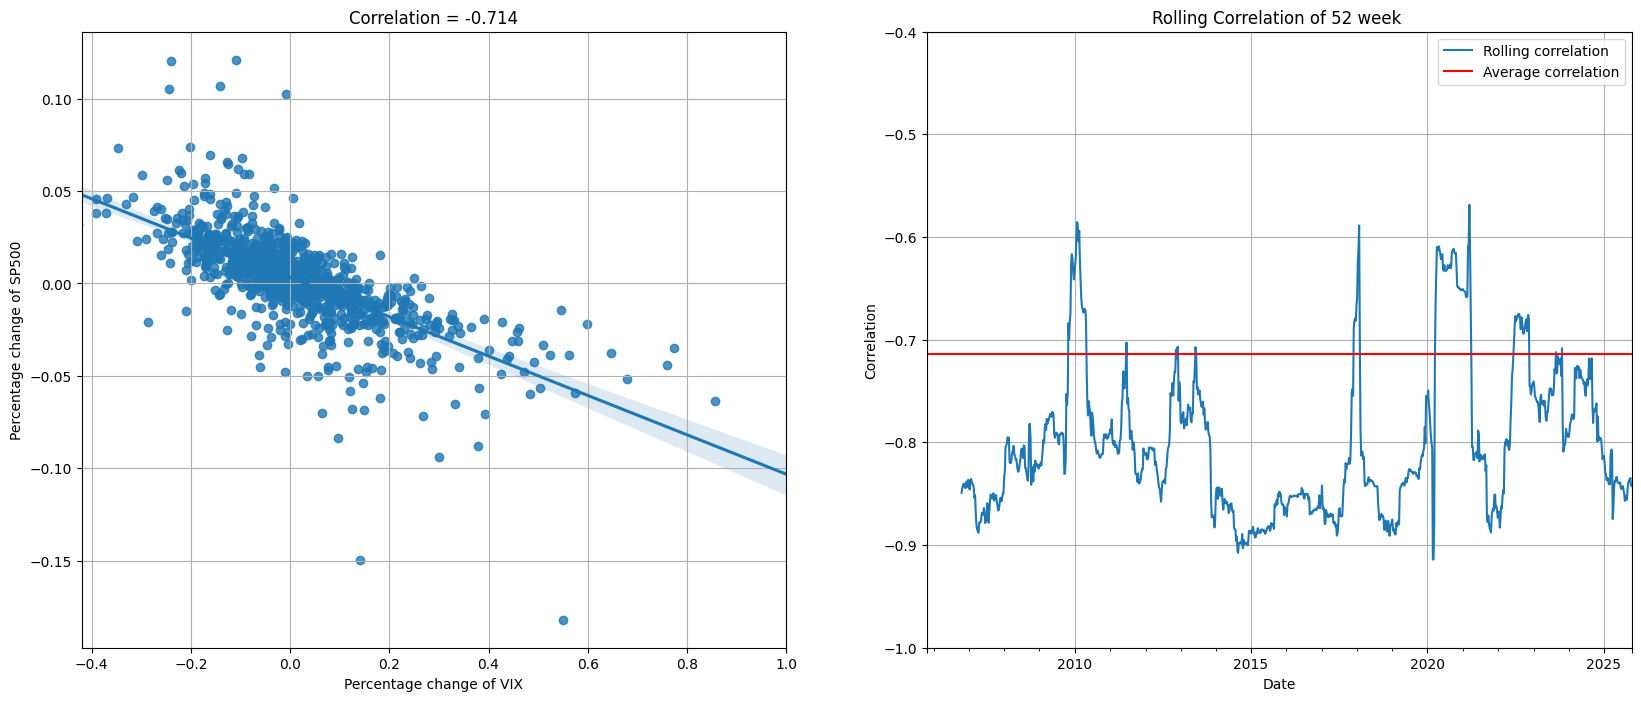

In [ ]:
data["VIX_change"] = data["VIX"].pct_change(1)
data["SP500_change"] = data["SP500"].pct_change(1)
data.dropna(inplace=True)

# correlation and scatter plot
corr = data['VIX_change'].corr(data['SP500_change'])

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.regplot(x='VIX_change', y='SP500_change', data=data)
plt.xlabel("Percentage change of VIX")
plt.ylabel("Percentage change of SP500")
plt.title(f"Correlation = {corr:.3f}")
plt.xlim(-0.42,1)
plt.grid()

# rolling correlation
window = 52
rolling_corr = data['VIX_change'].rolling(window).corr(data['SP500_change'])

plt.subplot(1,2,2)
rolling_corr.plot(color='tab:blue',label= "Rolling correlation")
plt.title(f'Rolling Correlation of {window} week ')
plt.axhline(corr,color="red",label= "Average correlation")
plt.ylabel('Correlation')
plt.ylim(-1,-0.4)
plt.legend()
plt.grid()

plt.show()